In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer


In [ ]:
ls "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/"

devSet.csv  dev_Y.p      test_X.p  trainSet.csv  train_Y.p
dev_X.p     testSet.csv  test_Y.p  train_X.p


In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/train_X.p


In [ ]:
mlb = MultiLabelBinarizer()
# load the train dataset
X_trainUnflat = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"train_Y.p", 'rb'))

print(X_trainUnflat.shape)
print(y_trainUnflat.shape)

X_train = X_trainUnflat.reshape(X_trainUnflat.shape[0],-1)
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_devUnflat = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"dev_Y.p", 'rb'))

print(X_devUnflat.shape)
print(y_devUnflat.shape)

X_dev = X_devUnflat.reshape(X_devUnflat.shape[0],-1)
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_testUnflat = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"test_Y.p", 'rb'))

print(X_testUnflat.shape)
print(y_testUnflat.shape)

X_test = X_testUnflat.reshape(X_testUnflat.shape[0],-1)
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)



(4246, 208, 160, 3)
(4246,)
(4246, 99840)
(4246, 3)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 3)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 3)


In [ ]:
numDims = X_train.shape[1]
numExamples = X_train.shape[0]

neurons1 = int(numDims/240)
neurons2 = int(numDims/480)
neurons3 = int(numDims/960)
neurons4 = int(numDims/1920)
neurons5 = int(numDims/3840)
neurons6 = int(numDims/7680)

print(neurons1)
print(neurons2)
print(neurons3)
print(neurons4)
print(neurons5)
print(neurons6)

416
208
104
52
26
13


In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER
#We keep number of layers, neuron per layer, activation in each layer constant
batchSizes = [100,200,300]

print(batchSizes)
num_epochs = 50

[100, 200, 300]


BatchSize :  100
Epoch 1/50
43/43 [==============================] - 3s 51ms/step - loss: 863.6332 - categorical_accuracy: 0.3144 - val_loss: 118.4690 - val_categorical_accuracy: 0.4956
Epoch 2/50
43/43 [==============================] - 2s 42ms/step - loss: 27.6215 - categorical_accuracy: 0.4880 - val_loss: 1.0804 - val_categorical_accuracy: 0.4747
Epoch 3/50
43/43 [==============================] - 2s 41ms/step - loss: 1.0712 - categorical_accuracy: 0.4936 - val_loss: 1.0697 - val_categorical_accuracy: 0.4747
Epoch 4/50
43/43 [==============================] - 2s 45ms/step - loss: 1.0605 - categorical_accuracy: 0.4936 - val_loss: 1.0626 - val_categorical_accuracy: 0.4747
Epoch 5/50
43/43 [==============================] - 2s 41ms/step - loss: 1.0525 - categorical_accuracy: 0.4936 - val_loss: 1.0573 - val_categorical_accuracy: 0.4747
Epoch 6/50
43/43 [==============================] - 2s 41ms/step - loss: 1.0464 - categorical_accuracy: 0.4936 - val_loss: 1.0534 - val_categorical_accur

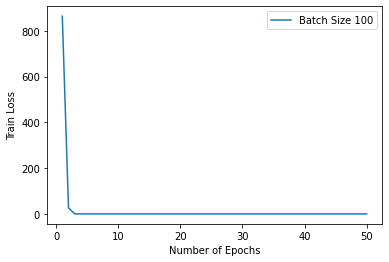

BatchSize :  200
Epoch 1/50
22/22 [==============================] - 2s 78ms/step - loss: 2075.9233 - categorical_accuracy: 0.3848 - val_loss: 877.1316 - val_categorical_accuracy: 0.3231
Epoch 2/50
22/22 [==============================] - 1s 61ms/step - loss: 405.3596 - categorical_accuracy: 0.4510 - val_loss: 121.4630 - val_categorical_accuracy: 0.4868
Epoch 3/50
22/22 [==============================] - 1s 60ms/step - loss: 169.5724 - categorical_accuracy: 0.4482 - val_loss: 326.0805 - val_categorical_accuracy: 0.3824
Epoch 4/50
22/22 [==============================] - 1s 61ms/step - loss: 285.6884 - categorical_accuracy: 0.4480 - val_loss: 415.9528 - val_categorical_accuracy: 0.3429
Epoch 5/50
22/22 [==============================] - 1s 58ms/step - loss: 152.2865 - categorical_accuracy: 0.5007 - val_loss: 77.4154 - val_categorical_accuracy: 0.5527
Epoch 6/50
22/22 [==============================] - 1s 58ms/step - loss: 88.8372 - categorical_accuracy: 0.5523 - val_loss: 137.5523 - val

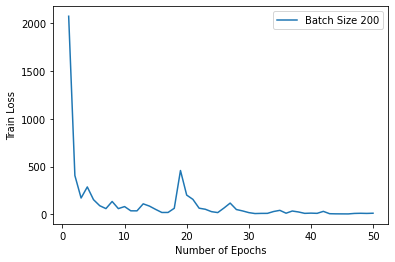

BatchSize :  300
Epoch 1/50
15/15 [==============================] - 2s 86ms/step - loss: 3980.5474 - categorical_accuracy: 0.4110 - val_loss: 3244.4866 - val_categorical_accuracy: 0.3231
Epoch 2/50
15/15 [==============================] - 1s 69ms/step - loss: 1830.9778 - categorical_accuracy: 0.3646 - val_loss: 1297.8015 - val_categorical_accuracy: 0.4747
Epoch 3/50
15/15 [==============================] - 1s 68ms/step - loss: 755.2819 - categorical_accuracy: 0.4072 - val_loss: 153.1975 - val_categorical_accuracy: 0.4396
Epoch 4/50
15/15 [==============================] - 1s 71ms/step - loss: 236.6091 - categorical_accuracy: 0.4498 - val_loss: 238.6530 - val_categorical_accuracy: 0.3044
Epoch 5/50
15/15 [==============================] - 1s 70ms/step - loss: 148.8176 - categorical_accuracy: 0.4437 - val_loss: 116.7109 - val_categorical_accuracy: 0.3835
Epoch 6/50
15/15 [==============================] - 1s 65ms/step - loss: 55.5890 - categorical_accuracy: 0.5403 - val_loss: 78.3451 - 

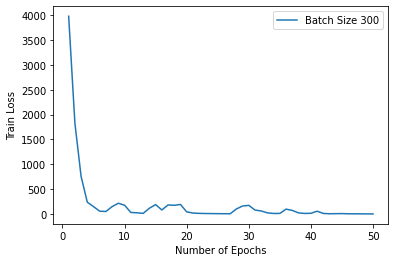

In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()
  model.add(Dense(neurons1, input_dim=numDims, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons5, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons6, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict.keys())
  #trainAccuracy.append(historyDict["accuracy"])
  #valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

  labelName = "Batch Size " + str(batchSize)
  pyplot.plot([i for i in range(1,num_epochs+1)], historyDict['loss'],label=labelName)

  pyplot.legend()
  pyplot.xlabel("Number of Epochs")
  pyplot.ylabel("Train Loss")
  pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


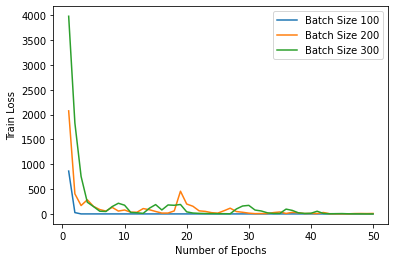

In [ ]:
#For Loss Plotting

x = [i for i in range(1,num_epochs+1)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


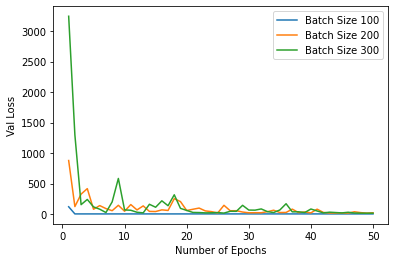

In [ ]:
#For Loss Plotting

x = [i for i in range(1,num_epochs+1)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
bestBatchSize = 300 #must decide based on graphs
bestIndexBS = batchSizes.index(bestBatchSize)

bestValLoss = valLoss[bestIndexBS]
#bestValAccuracy = valAccuracy[bestIndexBS]

print(bestValLoss)
print(min(bestValLoss))
print(bestValLoss.index(min(bestValLoss)))
bestEpoch = bestValLoss.index(min(bestValLoss))

[3244.486572265625, 1297.801513671875, 153.19752502441406, 238.65298461914062, 116.71092224121094, 78.34514617919922, 23.767169952392578, 198.03366088867188, 582.884765625, 66.70978546142578, 61.064361572265625, 28.20936393737793, 18.47246551513672, 159.0133056640625, 110.6476821899414, 216.12490844726562, 135.5169677734375, 314.885986328125, 92.04530334472656, 58.40297317504883, 25.386064529418945, 23.400362014770508, 17.959482192993164, 19.55559539794922, 23.56601905822754, 14.488950729370117, 44.399932861328125, 43.92564010620117, 142.18460083007812, 64.27870178222656, 62.83330154418945, 82.77969360351562, 38.65332794189453, 23.754838943481445, 65.70668029785156, 168.29603576660156, 34.87358093261719, 36.16520309448242, 23.253475189208984, 81.72042083740234, 49.16366195678711, 17.898324966430664, 29.352712631225586, 23.45301628112793, 17.979459762573242, 28.193330764770508, 15.615104675292969, 13.501884460449219, 13.010345458984375, 12.81895637512207]
12.81895637512207
49


In [ ]:
bestmodel = Sequential()
bestmodel.add(Dense(neurons1, input_dim=numDims, activation='relu', kernel_initializer=HeNormal()))
bestmodel.add(Dense(neurons5, activation='relu',kernel_initializer=HeNormal()))
bestmodel.add(Dense(neurons6, activation='relu',kernel_initializer=HeNormal()))
bestmodel.add(Dense(3, activation='softmax'))
bestmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
bestmodel.fit(X_train, y_train, epochs=bestEpoch, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))




Epoch 1/49
15/15 [==============================] - 2s 97ms/step - loss: 649.9974 - categorical_accuracy: 0.3457 - val_loss: 80.8100 - val_categorical_accuracy: 0.3440
Epoch 2/49
15/15 [==============================] - 1s 72ms/step - loss: 154.5407 - categorical_accuracy: 0.3851 - val_loss: 265.1071 - val_categorical_accuracy: 0.4747
Epoch 3/49
15/15 [==============================] - 1s 70ms/step - loss: 147.9393 - categorical_accuracy: 0.4381 - val_loss: 98.8170 - val_categorical_accuracy: 0.4989
Epoch 4/49
15/15 [==============================] - 1s 69ms/step - loss: 82.3902 - categorical_accuracy: 0.4628 - val_loss: 78.0460 - val_categorical_accuracy: 0.5066
Epoch 5/49
15/15 [==============================] - 1s 69ms/step - loss: 49.0343 - categorical_accuracy: 0.5000 - val_loss: 33.7563 - val_categorical_accuracy: 0.4407
Epoch 6/49
15/15 [==============================] - 1s 70ms/step - loss: 46.1595 - categorical_accuracy: 0.4986 - val_loss: 254.5788 - val_categorical_accuracy: 

In [ ]:
predictions = bestmodel.predict(X_test)


In [ ]:
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)

print(yTestNew)
print(yPredNew)

[1 0 0 0 2 1 1 0 1 1 2 0 1 1 1 0 0 1 2 2 0 0 2 0 1 0 0 2 2 1 0 1 2 0 1 0 0
 0 0 0 1 1 1 2 1 2 1 2 1 2 0 1 1 1 1 1 0 1 1 0 1 2 0 1 0 0 1 0 1 2 2 1 2 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 0 2 1 1 1 1 1 0 2 1 2 1 1 1 0 0 1 1 0 1 0
 0 2 1 1 1 1 0 2 0 0 0 2 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 2 2 1 2 1 0 0 0 0 0
 1 1 1 1 1 1 1 2 1 0 2 1 0 2 1 0 1 0 0 0 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 0
 1 0 2 1 0 2 0 2 1 2 2 2 2 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 2 0 0 1 0 1 2 1 1 1 1 0 0 2 1 1 1 2 2 0 1 0 1 0 1 2 1 0 1 1 0 0 2 0 1 1 1
 1 2 1 0 1 1 0 1 1 1 1 1 0 1 2 2 2 1 0 2 2 1 0 1 1 1 2 2 1 0 0 2 0 1 2 2 1
 2 1 1 0 2 2 1 2 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 1 1 2 1 0 2 0 1 1 0 0 1 1 2
 2 0 1 1 0 1 1 1 0 0 1 1 0 1 0 2 1 0 2 1 1 1 1 1 0 1 2 1 1 1 0 1 1 1 2 0 2
 0 0 0 1 2 2 2 1 1 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 2 0 0 2 0 1 0 1 1 2 0 0 1
 1 0 1 2 2 0 2 0 2 2 1 1 1 1 1 2 2 0 2 0 0 1 0 0 1 0 0 2 2 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 2 0 1 0 1 0 1 0 1 0 1 2 2 0 0 0 1 1 2 0 1 0 0 1 2 1 0 0 2 1 2
 1 1 0 1 1 0 2 0 1 0 1 0 

0.7392723787085299


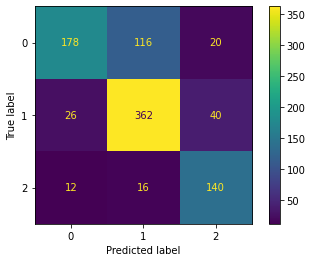

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cM = confusion_matrix(yTestNew,yPredNew)

displayClasses = [i for i in range(3)]


print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()